In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style('darkgrid');

In [13]:
files = [file for file in os.listdir('./Sales_Data')]

df = pd.DataFrame()
for file in files:
    temp_df = pd.read_csv('./Sales_Data/' + file)
    df = pd.concat([df, temp_df])

In [14]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [15]:
print('The dataset contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataset contains 186850 rows and 6 columns


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


We can find out that all columns are string type. Some of them should be fixed and transformed to numeric type later, like quantity and price.

# Fixing NaN values

In [17]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

All columns have 604 NaN values, which could indicate they are in the ame rows. Take a further look in them.

In [18]:
df[df.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
12567,NaN,NaN,NaN,NaN,NaN,NaN
12640,NaN,NaN,NaN,NaN,NaN,NaN
12659,NaN,NaN,NaN,NaN,NaN,NaN
12732,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df = df.dropna(how='all')

# Transforming Data Types

In [20]:
df = df[df['Order ID'].str[:] != 'Order ID']

In [21]:
df['Order ID'] = pd.to_numeric(df.loc[:,'Order ID'])
df['Quantity Ordered'] = pd.to_numeric(df.loc[:,'Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df.loc[:,'Price Each'])
df['Order Date'] = pd.to_datetime(df.loc[:,'Order Date'])

# Create new columns for Datetime and location

In [22]:
df['Month'] = df['Order Date'].dt.month
df['DayOfWeek'] = df['Order Date'].dt.dayofweek
df['Hour'] = df['Order Date'].dt.hour

In [23]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(', ')[1])
df['State'] = df['Purchase Address'].apply(lambda x: x.split(', ')[2][:2])

In [24]:
df['TotalPrice'] = df['Price Each'] * df['Quantity Ordered']

# Visualization

### Which month had the highest sales, and which had the lowest?  

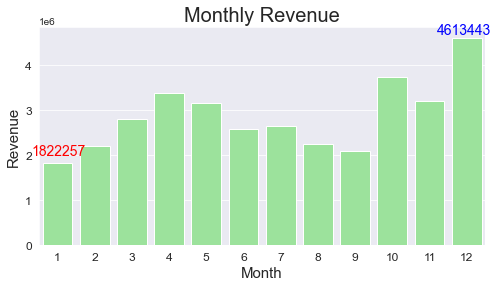

In [42]:
month_revenue = df.groupby('Month').sum()['TotalPrice']

fig = plt.figure(figsize=(8,4));
ax = fig.add_subplot(111);

sns.barplot(month_revenue.index, month_revenue, color='lightgreen');
plt.title('Monthly Revenue', fontsize=20);
plt.xlabel('Month', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

ax.text(10.2, 4700000, round(month_revenue.max()), fontsize=14, color='blue');
ax.text(-0.7, 2000000, round(month_revenue.min()), fontsize=14, color='red');

plt.show()

### Did people buy more on specific day of week?

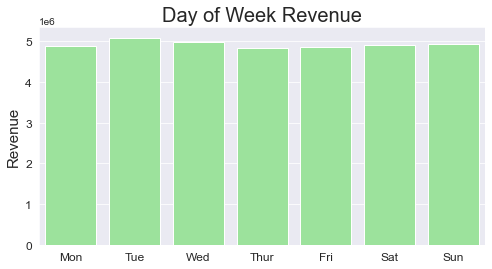

In [116]:
dayofweek_revenue = df.groupby('DayOfWeek').sum()['TotalPrice']

plt.figure(figsize=(8,4))

sns.barplot(dayofweek_revenue.index, dayofweek_revenue, color='lightgreen');
plt.title('Day of Week Revenue', fontsize=20);
plt.xlabel('', fontsize=15);
plt.ylabel('Revenue', fontsize=15);
plt.xticks(dayofweek_revenue.index, ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'],fontsize=12);
plt.yticks(fontsize=12);


plt.show()

### Which state and city had the best selling record?

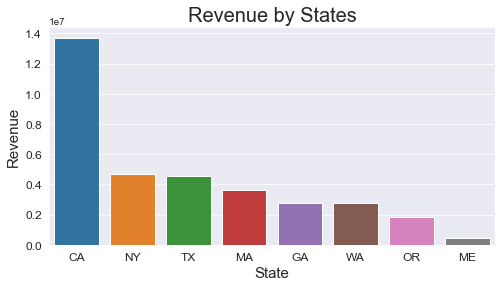

In [68]:
state_rev = df.groupby('State').sum()['TotalPrice'].sort_values(ascending=False)

plt.figure(figsize=(8,4));

sns.barplot(state_rev.index, state_rev);
plt.title('Revenue by States', fontsize=20);
plt.xlabel('State', fontsize=15);
plt.ylabel('Revenue', fontsize=15);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

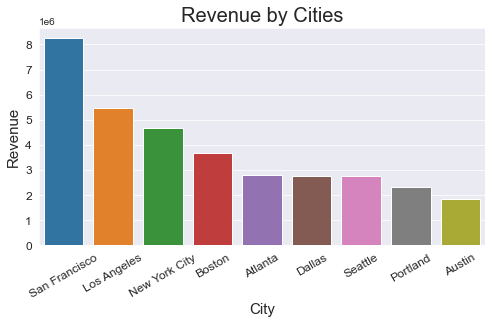

In [72]:
city_rev = df.groupby('City').sum()['TotalPrice'].sort_values(ascending=False);

plt.figure(figsize=(8,4));

sns.barplot(city_rev.index, city_rev);
plt.title('Revenue by Cities', fontsize=20);
plt.xlabel('City', fontsize=15);
plt.ylabel('Revenue', fontsize=15);
plt.xticks(fontsize=12, rotation=30);
plt.yticks(fontsize=12);

### What time did people tend to go shopping?

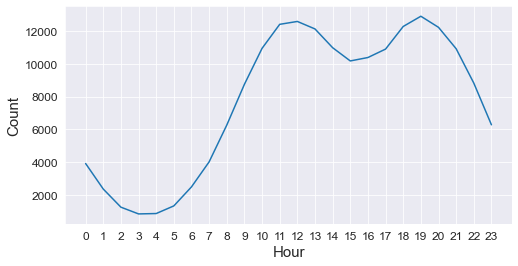

In [117]:
hour_count = df.groupby('Hour').count()['TotalPrice']

plt.figure(figsize=(8,4));

sns.lineplot(hour_count.index, hour_count);
plt.xticks(hour_count.index, fontsize=12);
plt.yticks(fontsize=12);
plt.xlabel('Hour', fontsize=15);
plt.ylabel('Count', fontsize=15);

### Which product was sold the most by quantity and by revenue?

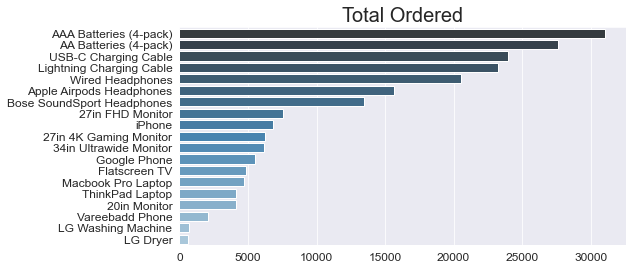

In [108]:
popular_product = df.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending=False)

plt.figure(figsize=(8,4))

sns.barplot(popular_product, popular_product.index, palette='Blues_d');
plt.title('Total Ordered', fontsize=20);
plt.xlabel('', fontsize=15);
plt.ylabel('', fontsize=15);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

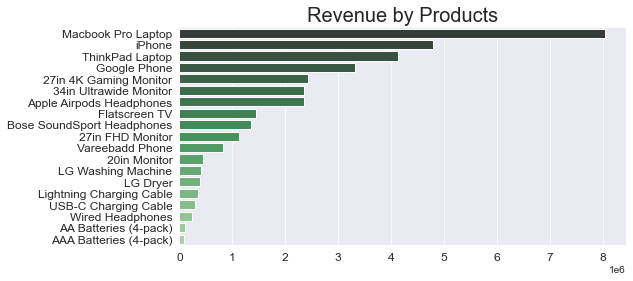

In [115]:
product_rev = df.groupby('Product').sum()['TotalPrice'].sort_values(ascending=False)

plt.figure(figsize=(8,4))

sns.barplot(product_rev, product_rev.index, palette='Greens_d');
plt.title('Revenue by Products', fontsize=20);
plt.xlabel('', fontsize=15);
plt.ylabel('', fontsize=15);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

In [123]:
df.groupby('Order ID')['Product'].sum()

Order ID
141234                        iPhone
141235      Lightning Charging Cable
141236              Wired Headphones
141237              27in FHD Monitor
141238              Wired Headphones
                     ...            
319666      Lightning Charging Cable
319667         AA Batteries (4-pack)
319668               Vareebadd Phone
319669              Wired Headphones
319670    Bose SoundSport Headphones
Name: Product, Length: 178437, dtype: object

### What products were sold together most often?

In [150]:
combo_order = df[df['Order ID'].duplicated(keep=False)]
combo_order['combo'] = combo_order.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
combo_order = combo_order[['Order ID', 'combo']].drop_duplicates()

combo_order.head()

<ipython-input-150-4297f799f794>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_order['combo'] = combo_order.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,combo
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [157]:
from itertools import combinations
from collections import Counter

counter = Counter()
for combo in combo_order['combo']:
    item_list = combo.split(',')
    counter.update(Counter(combinations(item_list, 2)))


for i in counter.most_common(10):
    print(i[0], i[1])

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
